In [1]:
import numpy as np
from spectral_cube import SpectralCube

In [2]:
import pyspeckit

Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).


g++ -std=c++11   -Ofast -fopenmp -DNDEBUG -DHAVE_INLINE -MMD -MP -fPIC   -c -o pwind_geom.o pwind_geom.cpp


In file included from pwind_geom.cpp:2:
pwind_util.H:9:10: fatal error: gsl/gsl_sf_erf.h: No such file or directory
    9 | #include <gsl/gsl_sf_erf.h>
      |          ^~~~~~~~~~~~~~~~~~
compilation terminated.
make: *** [<builtin>: pwind_geom.o] Error 1


In [3]:
cube = SpectralCube.read('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults/G351.77/B6/fullcubes_12m/G351.77_B6_spw7_12M_spw7.image.fits')

Cube is a Stokes cube, returning spectral cube for I component


In [4]:
import sys
sys.executable

'/blue/adamginsburg/adamginsburg/miniconda3/envs/python310/bin/python'

In [5]:
im = cube[50].value

In [6]:
mxy,mxx = np.unravel_index(np.nanargmax(im), cube.shape[1:])
mxy,mxx

(467, 565)

In [7]:
from astropy import units as u

In [8]:
csp = cube[:,mxy,mxx]
csp = cube[:,mxy,mxx].to(u.K, u.brightness_temperature(csp.spectral_axis))

In [11]:
sp = pyspeckit.Spectrum.from_hdu(csp.hdu)
sp.spectral_axis.convert_to_unit(u.GHz)

There are multiple beams for this spectrum that are being ignored when creating the HDU.


AttributeError: 'Spectrum' object has no attribute 'spectral_axis'

In [ ]:
sp.plotter()

In [17]:
sp.baseline.selectregion(exclude=[])

In [13]:
sp.plotter(xmin=232.27, xmax=232.49)

<IPython.core.display.Javascript object>

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


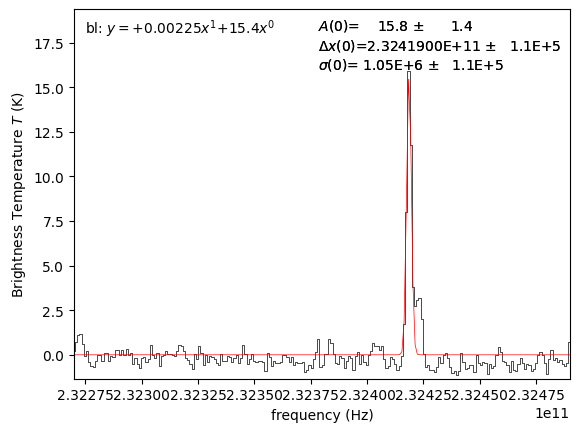

In [26]:
sp.plotter(xmin=232.27, xmax=232.49)

sp.baseline()
sp.specfit(guesses=[35, 232.424, 1e-3])

In [18]:
from pyspeckit.spectrum.models import lte_molecule

In [19]:
from astropy import units as u

In [20]:
freqs, aij, deg, EU, partfunc = lte_molecule.get_molecular_parameters('CH3OCHO', fmin=200*u.GHz, fmax=250*u.GHz, export_limit=1e5)

In [21]:
mod = lte_molecule.generate_model(sp.xarr, 0*u.km/u.s, 5*u.km/u.s, 50*u.K, 1e16*u.cm**-2, freqs, aij, deg, EU, partfunc)

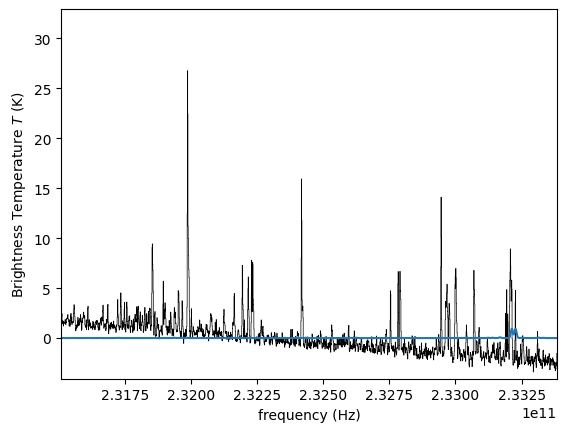

In [27]:
sp.plotter(clear=True)
sp.plotter.axis.plot(sp.xarr, mod)

In [29]:
%matplotlib nbagg

In [30]:
sp.plotter()

<IPython.core.display.Javascript object>

In [ ]:
#Vso... re:xclass - for line ID things, we can probably do this with pyspeckit, and I understand what's going on a lot better there.  For example.